In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g7N8W12FtZNSnOLZCI62sqzeTkV-KkhhBvXITFbZYqyHqgp-3ZZmg0
Mounted at /content/drive


In [3]:
#cd drive/MyDrive/temp/Sentiment_Analysis

In [2]:
ls

drive/  sample_data/


In [4]:
cd /content/drive/My Drive/Sentiment_Analysis

/content/drive/My Drive/Sentiment_Analysis


In [5]:
import os
import numpy as np
import pandas as pd
import tweepy as tw
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import configparser

In [6]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [7]:
print(train.shape)
print(test.shape)

(1426, 6)
(575, 6)


In [8]:
train.head()

,Unnamed: 0,tweet,user,location,label,split
0,0,just curious! \nWhy not turn airplanes into ox...,harshilh369,"San Francisco, CA",0,-1.071454
1,2,rt @the_hindu: the government will set up a de...,dev_vaish,"Agra, India",0,-1.649249
2,3,rt @drshamamohd: 8 more people die due to lack...,Muslimah_MINA,NaN,1,-0.511046
3,5,@fact aiming to plant #smartoxytree with 95% p...,jha_yatendra,India,0,-1.027924
4,6,rt @the_hindu: the government will set up a de...,TelanganaVoices,Hyderabad,0,1.842672


In [9]:
test.head()

,Unnamed: 0,tweet,user,location,label,split
0,1,rt @vikramdevinc: 100 #oxygen #beds are #avail...,RamkhilariSood,"Jodhpur, India",0,0.893543
1,4,rt @aiadmkofficial: honourable leader of oppos...,RajeshSRaje,Cuddalore,0,-1.304168
2,7,rt @the_hindu: the government will set up a de...,1995MODASSIR,"Amawan,RAJAULI, Nawadah(Bihar)",0,2.756874
3,11,in a major boost to oxygen supply in #andhrap...,scribesoldier,NaN,0,0.033384
4,12,@telebusiness @telegraph @jamescrisp6 @lucymbu...,jha_yatendra,India,0,-0.261433


In [10]:
train.isnull().any()
test.isnull().any()

Unnamed: 0    False
tweet         False
user          False
location       True
label         False
split         False
dtype: bool

In [11]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,Unnamed: 0,tweet,user,location,label,split
0,0,just curious! \nWhy not turn airplanes into ox...,harshilh369,"San Francisco, CA",0,-1.071454
1,2,rt @the_hindu: the government will set up a de...,dev_vaish,"Agra, India",0,-1.649249
3,5,@fact aiming to plant #smartoxytree with 95% p...,jha_yatendra,India,0,-1.027924
4,6,rt @the_hindu: the government will set up a de...,TelanganaVoices,Hyderabad,0,1.842672
6,9,"rt @ians_india: ntpc ltd (@ntpclimited), india...",AtifEja11027749,"New Delhi, India",0,-0.739567
7,10,rt @rajan_tewari: attention ⚠️\n\nthis is not ...,akashmi30,NaN,0,-0.829713
8,13,rt @aaravseth_: #sunday4securedfuture is back ...,ElisaSVB,NaN,0,-1.008799
9,14,rt @jha_yatendra: @abhishekbehl @mlkhattar aim...,wordsandviews,"Gurgaon, India",0,-0.843196
10,15,cylinder waali bitiya: #shahjahanpur's daughte...,thetribunechd,Chandigarh,0,1.227676
11,16,@thegef @undp aiming to plant #smartoxytree wi...,jha_yatendra,India,0,0.451195


In [12]:
# checking out the postive tweets from the train set 

train[train['label'] == 1].head(10)

,Unnamed: 0,tweet,user,location,label,split
2,3,rt @drshamamohd: 8 more people die due to lack...,Muslimah_MINA,NaN,1,-0.511046
5,8,rt @drshamamohd: 8 more people die due to lack...,BentinZtweetZ,"Bengaluru, India",1,0.515011
15,22,rt @sharmakhemchand: #kejriwal yesterday spent...,alokdubey1408,#IAmNewIndia,1,-1.659132
18,26,rt @drshamamohd: 8 more people die due to lack...,kassalv,NaN,1,-1.289497
19,27,rt @drshamamohd: 8 more people die due to lack...,sistla19791,NaN,1,0.087167
24,38,@abplivenews #indiahijacked mitroooo \nno soci...,LongmanGill,Canada,1,0.052342
27,43,rt @drshamamohd: 8 more people die due to lack...,Sanjeev7184,Thane,1,0.738199
40,57,this is the kind of week that leaves me frustr...,msbreviews,Portugal,1,1.011858
43,63,rt @mahendermanral: for the lack of #oxygen. ...,hatefreeworldX,Assol Nation Led by Ass,1,0.691255
45,66,rt @mahendermanral: for the lack of #oxygen. ...,Jenin65149160,NaN,1,-0.483568


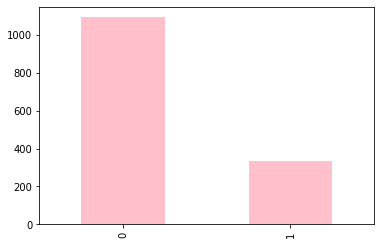

In [14]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

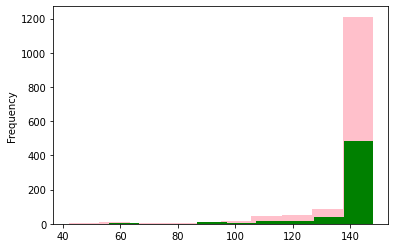

In [15]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'green', figsize = (6, 4))

In [16]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,Unnamed: 0,tweet,user,location,label,split,len
0,0,just curious! \nWhy not turn airplanes into ox...,harshilh369,"San Francisco, CA",0,-1.071454,140
1,2,rt @the_hindu: the government will set up a de...,dev_vaish,"Agra, India",0,-1.649249,140
2,3,rt @drshamamohd: 8 more people die due to lack...,Muslimah_MINA,NaN,1,-0.511046,140
3,5,@fact aiming to plant #smartoxytree with 95% p...,jha_yatendra,India,0,-1.027924,140
4,6,rt @the_hindu: the government will set up a de...,TelanganaVoices,Hyderabad,0,1.842672,140
5,8,rt @drshamamohd: 8 more people die due to lack...,BentinZtweetZ,"Bengaluru, India",1,0.515011,140
6,9,"rt @ians_india: ntpc ltd (@ntpclimited), india...",AtifEja11027749,"New Delhi, India",0,-0.739567,140
7,10,rt @rajan_tewari: attention ⚠️\n\nthis is not ...,akashmi30,NaN,0,-0.829713,140
8,13,rt @aaravseth_: #sunday4securedfuture is back ...,ElisaSVB,NaN,0,-1.008799,144
9,14,rt @jha_yatendra: @abhishekbehl @mlkhattar aim...,wordsandviews,"Gurgaon, India",0,-0.843196,140


In [17]:
train.groupby('label').describe()

Unnamed: 0                                ...    len                     
           count         mean         std  min  ...    25%    50%    75%    max
label                                           ...                            
0         1092.0  1017.156593  576.028121  0.0  ...  139.0  140.0  140.0  148.0
1          334.0   981.422156  568.808722  3.0  ...  140.0  140.0  140.0  144.0

[2 rows x 24 columns]

Text(0.5, 1.0, 'Most Common words')

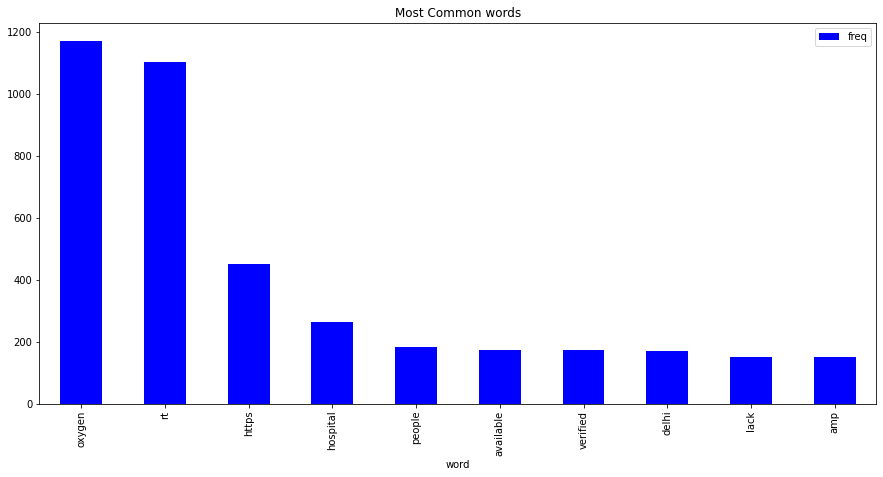

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(10).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Common words")

Text(0.5, 1.0, 'Commonly Occuring Words')

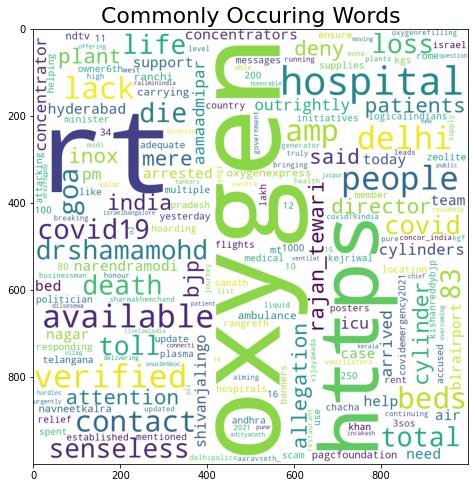

In [19]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("Commonly Occuring Words", fontsize = 22)

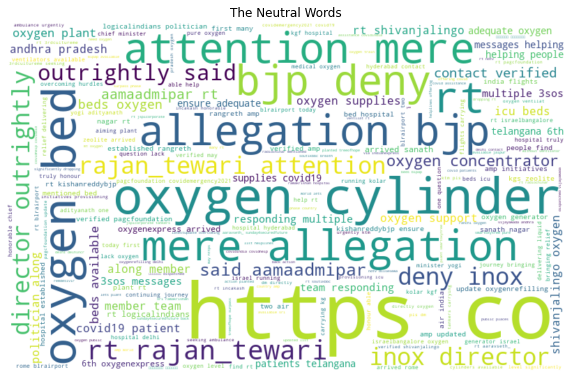

In [20]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(background_color = 'white',width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

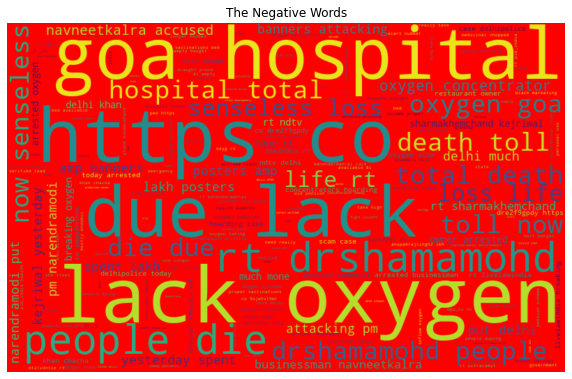

In [21]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'red', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [22]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [23]:
import re
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [24]:
import nltk

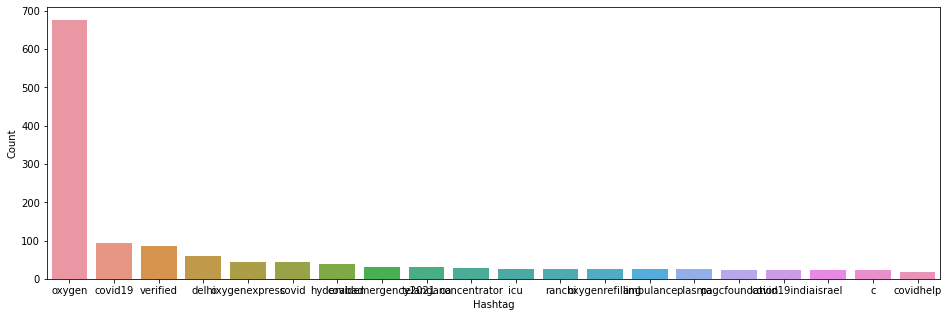

In [25]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2346 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2346 missing from current font.
  font.set_text(s, 0,

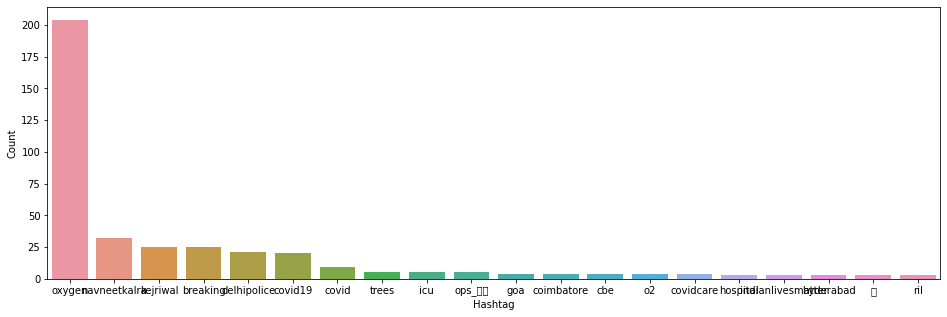

In [26]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [27]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(394960, 554840)

In [28]:
model_w2v.wv.most_similar(positive = "oxygen")

[('(refundable', 0.5134339332580566),
 ('dep…', 0.5023983120918274),
 ('city:', 0.49387767910957336),
 ('hospital…', 0.49319833517074585),
 ('#indiafightscorona', 0.48986074328422546),
 ('#covidrelief', 0.48749351501464844),
 ('5l', 0.48639070987701416),
 ('varanasi', 0.47491857409477234),
 ('40', 0.47454649209976196),
 ('@livelawindia:', 0.4732726812362671)]

In [29]:
# from tqdm import tqdm
# tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [30]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)
labeled_tweets[:6]

[TaggedDocument(words=['just', 'curious!', 'Why', 'not', 'turn', 'airplanes', 'into', 'oxygen', 'equipped', 'hospital?', 'They', 'already', 'have', 'oxygen', 'system', 'in', 'place', 'in', 'p…', 'https://t.co/AFixtZF0RY'], tags=['tweet_0']),
 TaggedDocument(words=['rt', '@the_hindu:', 'the', 'government', 'will', 'set', 'up', 'a', 'dedicated', 'website', 'for', 'the', 'purpose', 'where', 'hospitals', 'treating', 'patients', 'on', '#oxygen', 'support', 'with', 'the…'], tags=['tweet_1']),
 TaggedDocument(words=['rt', '@drshamamohd:', '8', 'more', 'people', 'die', 'due', 'to', 'lack', 'of', '#oxygen', 'at', 'goa', 'hospital.', 'the', 'total', 'death', 'toll', 'is', 'now', '83.', 'what', 'a', 'senseless', 'loss', 'of', 'life!', 'i…'], tags=['tweet_2']),
 TaggedDocument(words=['@fact', 'aiming', 'to', 'plant', '#smartoxytree', 'with', '95%', 'pure', '#oxygen', 'in', 'public', 'places', 'for', 'asthmatic', 'people/emergencies...comin…', 'https://t.co/h3qmpf1xhx'], tags=['tweet_3']),
 TaggedD

In [31]:
# removing unwanted elements from the data
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
train_corpus = []
for i in range(0, len(train)):
    review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()

    # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

    # joining them back with spacereview = ' '.join(review)
    train_corpus.append(review)

In [33]:
test_corpus = []
for i in range(0, len(test)):
    review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    
    # stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    # joining them back with space
    review = ' '.join(review)
    test_corpus.append(review)

In [34]:
train_corpus1 = []
for element in train_corpus:
    train_corpus1.append(' '.join(element))

In [35]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus1).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(1426, 2500)
(1426,)


In [36]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(575, 1790)


In [37]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(1069, 2500)
(357, 2500)
(1069,)
(357,)


In [38]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
#x_test  = sc.transform(x_test)

In [39]:
y_train

170     rt @pushpdeep: so, our team at tctd at #iitbom...
1010    rt @ngpnmc: for information regarding bed allo...
365     rt @sharmakhemchand: #kejriwal yesterday spent...
942     rt @kishanreddybjp: to ensure adequate #oxygen...
209     rt @drshamamohd: 8 more people die due to lack...
                              ...                        
1095    rt @mohfw_india: #unite2fightcorona\n\nglobal ...
1130    rt @agf_ofl: #oxygen high rich foods \neat hea...
1294    about the weekend.... kindly endeavor to breet...
860     @virenderadr 📢 scam alert📢\nthis number belong...
1126    rt @covidhelpchd: @bot_assist #verified &amp; ...
Name: tweet, Length: 1069, dtype: object

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred,average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9971936389148737
Validation Accuracy : 0.6190476190476191
F1 score : 0.6190476190476191
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred,average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.6114285714285714
f1 score : 0.6114285714285714
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred, average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.6114285714285714
f1 score : 0.6114285714285714
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred,average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9561068702290076
Validation Accuracy : 0.6057142857142858
f1 score : 0.6057142857142858
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
